In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
import pandas as pd

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    col_name1, col_name2 = X.columns
    X = X.values
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        plt.xlabel(col_name1)
        plt.ylabel(col_name2)
        plt.legend()

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

In [3]:
df = pd.read_excel('modify_feature_engineer_train.xlsx')

drop_list = ['accession', 'scan protocol', 'scan series', 'target region',
       'scanning length', 'kV', 'mean mA', 'max mA', 'nomial total collimation width',
            'CTDIw phantom type', 'Mean CTDIvol', 'DLP', 'exposure time','study_date', 'id',
            'bmi_body_surface_area_category', 'category_bmi',
       'age_weight_kg_category', 'scan_area_method_combine',
       'scan_area_method_bmi_catgory_combine',
       'bmi_bsa_cat_scan_area_method_combine',
       'age_weight_cat_scan_area_method_combine']
df.drop(drop_list, axis=1, inplace=True)


def replace_pitch_factor(df):
    if df['pitch factor'] == 0.99 or df['pitch factor'] == 0.98:
        return 1.0
    elif df['pitch factor'] == 0.52:
        return 0.51
    else:
        return df['pitch factor']



df['pitch factor'] = df.apply(replace_pitch_factor, axis=1)

df_chest = df[df['scan_area'] == '胸部CT']
df_chest_pelvis = df[df['scan_area'] == '胸部〜骨盤CT']
df_abd_pelvis = df[df['scan_area'] == '腹部〜骨盤CT']
df_inner = df[df['scan_area'] == '副鼻腔CT']
df_th_lw = df[df['scan_area'] == '胸腰椎CT']
df_leg = df[df['scan_area'] == '大腿・膝・下腿CT']
df_up_abd = df[df['scan_area'] == '上腹部CT']
df_dual = df[df['scan_area'] == '体幹部Dual Energy CT']
df_foot = df[df['scan_area'] == '足・足関節CT']
df_up_arm = df[df['scan_area'] == '肩・上腕・鎖骨CT']
df_neck_pelvis = df[df['scan_area'] == '頸部〜骨盤CT']
df_arm = df[df['scan_area'] == '肘・前腕・手関節CT']
df_cw = df[df['scan_area'] == '頸椎・頚髄CT']
df_neck = df[df['scan_area'] == '頸部CT']
df_pelvis_bone = df[df['scan_area'] == '骨盤骨CT']
df_face = df[df['scan_area'] == '顔面骨CT']
df_heart = df[df['scan_area'] == '冠動脈CT']
df_lung_vein = df[df['scan_area'] == '肺静脈CT']
df_lung = df[df['scan_area'] == '肺塞栓CT']
df_tooth = df[df['scan_area'] == '歯・顎骨CT']
df_perfusion = df[df['scan_area'] == '脳Perfusion']
df_brain_cta = df[df['scan_area'] == '脳CTA']
df_brain = df[df['scan_area'] == '脳CT']
df_side_bone = df[df['scan_area'] == '側頭骨CT']

df_list = [df_chest, df_chest_pelvis, df_abd_pelvis, df_inner,
           df_th_lw, df_leg, df_up_abd, df_dual, df_foot, df_up_arm,
           df_neck_pelvis, df_arm, df_cw, df_neck, df_pelvis_bone, df_face,
           df_heart, df_lung_vein, df_lung, df_tooth, df_perfusion, df_brain_cta,
           df_brain, df_side_bone]


In [6]:
import numpy as np

In [485]:
def pitch_factor_pred(df):
    columns = [ 'height_cm', 'weight_kg']
    X = df.loc[:, columns]
    y = df['pitch factor']
    y = y.astype('str')

#     oe_columns = ['gender', 'scan_method']

#     oe = OrdinalEncoder()
#     oe.set_output(transform='pandas')

#     X[oe_columns] = oe.fit_transform(X[oe_columns])
#     X[['gender', 'scan_method']] = X[['gender', 'scan_method']].astype('object')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=3,
                                        random_state=42)
    tree_model.fit(X_train, y_train)


    y_pred = tree_model.predict(X_test)
    
    # plot_decision_regions(X.values, y.values, classifier=tree_model)
    return (accuracy_score(y_test, y_pred))

def rotation_time_pred(df):
    columns = [ 'height_cm', 'weight_kg']
    X = df.loc[:, columns]
    y = df['exposure time per rotation']
    y = y.astype('str')

#     oe_columns = ['gender', 'scan_method']

#     oe = OrdinalEncoder()
#     oe.set_output(transform='pandas')

#     X[oe_columns] = oe.fit_transform(X[oe_columns])
#     X[['gender', 'scan_method']] = X[['gender', 'scan_method']].astype('object')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=4,
                                        random_state=42)
    tree_model.fit(X_train, y_train)


    y_pred = tree_model.predict(X_test)
    # plot_decision_regions(X[columns].values, y.values, classifier=tree_model)
    return (accuracy_score(y_test, y_pred))

In [487]:
df_list = [df_chest, df_chest_pelvis, df_abd_pelvis, df_inner,
           df_th_lw, df_leg, df_up_abd, df_dual, df_foot, df_up_arm,
           df_neck_pelvis, df_arm, df_cw, df_neck, df_pelvis_bone, df_face,
           df_heart, df_lung_vein, df_lung, df_tooth, df_perfusion, df_brain_cta,
           df_brain, df_side_bone]
for df_temp in df_list:
    print(f'{df_temp["pitch factor"].unique()}')
    print(f'{df_temp["scan_area"].unique()}: pitch_factor_accuracy: {pitch_factor_pred(df_temp):.3f}')
    print(f'{df_temp["scan_area"].unique()}: rotation_time_accuracy: {rotation_time_pred(df_temp):.3f}')
    print("=======================================")

[1.38 1.   0.51]
['胸部CT']: pitch_factor_accuracy: 0.783
['胸部CT']: rotation_time_accuracy: 0.959
[1.38 1.   0.51]
['胸部〜骨盤CT']: pitch_factor_accuracy: 0.514
['胸部〜骨盤CT']: rotation_time_accuracy: 0.737
[1.   0.51 1.38]
['腹部〜骨盤CT']: pitch_factor_accuracy: 0.684
['腹部〜骨盤CT']: rotation_time_accuracy: 0.939
[0.51 1.  ]
['副鼻腔CT']: pitch_factor_accuracy: 1.000
['副鼻腔CT']: rotation_time_accuracy: 0.881
[0.51 1.  ]
['胸腰椎CT']: pitch_factor_accuracy: 1.000
['胸腰椎CT']: rotation_time_accuracy: 0.975
[1.   0.51]
['大腿・膝・下腿CT']: pitch_factor_accuracy: 0.647
['大腿・膝・下腿CT']: rotation_time_accuracy: 0.706
[1.   0.51]
['上腹部CT']: pitch_factor_accuracy: 0.698
['上腹部CT']: rotation_time_accuracy: 0.837
[0.51 1.   1.38]
['体幹部Dual Energy CT']: pitch_factor_accuracy: 0.829
['体幹部Dual Energy CT']: rotation_time_accuracy: 0.786
[0.51 1.  ]
['足・足関節CT']: pitch_factor_accuracy: 0.833
['足・足関節CT']: rotation_time_accuracy: 1.000
[0.51]
['肩・上腕・鎖骨CT']: pitch_factor_accuracy: 1.000
['肩・上腕・鎖骨CT']: rotation_time_accuracy: 0.500
[1.  

In [7]:
from sklearn.model_selection import KFold

def pitch_factor_pred(df):
    columns = [ 'bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['pitch factor']
    y = y.astype('str')
    scores = []

#     oe_columns = ['gender', 'scan_method']

#     oe = OrdinalEncoder()
#     oe.set_output(transform='pandas')

#     X[oe_columns] = oe.fit_transform(X[oe_columns])
#     X[['gender', 'scan_method']] = X[['gender', 'scan_method']].astype('object')
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=8,
                                        random_state=42)
        tree_model.fit(X_tr, y_tr)


        y_pred = tree_model.predict(X_va)
        scores.append(accuracy_score(y_va, y_pred))
        
    return np.mean(scores)
    
    # plot_decision_regions(X.values, y.values, classifier=tree_model)
    # return (accuracy_score(y_test, y_pred))

def rotation_time_pred(df):
    columns = [ 'bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['exposure time per rotation']
    y = y.astype('str')
    scores = []

#     oe_columns = ['gender', 'scan_method']

#     oe = OrdinalEncoder()
#     oe.set_output(transform='pandas')

#     X[oe_columns] = oe.fit_transform(X[oe_columns])
#     X[['gender', 'scan_method']] = X[['gender', 'scan_method']].astype('object')
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=8,
                                        random_state=42)
        tree_model.fit(X_tr, y_tr)


        y_pred = tree_model.predict(X_va)
        y_pred_train = tree_model.predict(X_tr)
        
        scores.append(accuracy_score(y_va, y_pred))
        
    return np.mean(scores)
    

In [8]:
df_list = [df_chest, df_chest_pelvis, df_abd_pelvis, df_inner,
           df_th_lw, df_leg, df_up_abd, df_dual, df_foot, df_up_arm,
           df_neck_pelvis, df_arm, df_cw, df_neck, df_pelvis_bone, df_face,
           df_heart, df_lung_vein, df_lung, df_tooth, df_perfusion, df_brain_cta,
           df_brain, df_side_bone]
for df_temp in df_list:
    print(f'{df_temp["pitch factor"].unique()}')
    print(f'{df_temp["scan_area"].unique()}: pitch_factor_accuracy: {pitch_factor_pred(df_temp):.3f}')
    print(f'{df_temp["exposure time per rotation"].unique()}')
    print(f'{df_temp["scan_area"].unique()}: rotation_time_accuracy: {rotation_time_pred(df_temp):.3f}')
    print("=======================================")

[1.38 1.   0.51]
['胸部CT']: pitch_factor_accuracy: 0.791
[0.5 0.7 0.6 0.8 1.  0.9]
['胸部CT']: rotation_time_accuracy: 0.955
[1.38 1.   0.51]
['胸部〜骨盤CT']: pitch_factor_accuracy: 0.553
[0.5  0.6  1.   0.35 0.8  0.7  0.9 ]
['胸部〜骨盤CT']: rotation_time_accuracy: 0.715
[1.   0.51 1.38]
['腹部〜骨盤CT']: pitch_factor_accuracy: 0.695
[0.6 0.5 0.7 0.8 0.9 1. ]
['腹部〜骨盤CT']: rotation_time_accuracy: 0.942
[0.51 1.  ]
['副鼻腔CT']: pitch_factor_accuracy: 0.994
[0.6 0.7 0.8]
['副鼻腔CT']: rotation_time_accuracy: 0.922
[0.51 1.  ]
['胸腰椎CT']: pitch_factor_accuracy: 0.990
[0.6 0.7]
['胸腰椎CT']: rotation_time_accuracy: 0.975
[1.   0.51]
['大腿・膝・下腿CT']: pitch_factor_accuracy: 0.723
[0.6 0.7 0.8 1.  0.5 0.9]
['大腿・膝・下腿CT']: rotation_time_accuracy: 0.542
[1.   0.51]
['上腹部CT']: pitch_factor_accuracy: 0.712
[0.6 0.5 0.7 1.  0.9]
['上腹部CT']: rotation_time_accuracy: 0.878
[0.51 1.   1.38]
['体幹部Dual Energy CT']: pitch_factor_accuracy: 0.791
[0.8 1.  0.6]
['体幹部Dual Energy CT']: rotation_time_accuracy: 0.877
[0.51 1.  ]
['足・足関節CT']

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


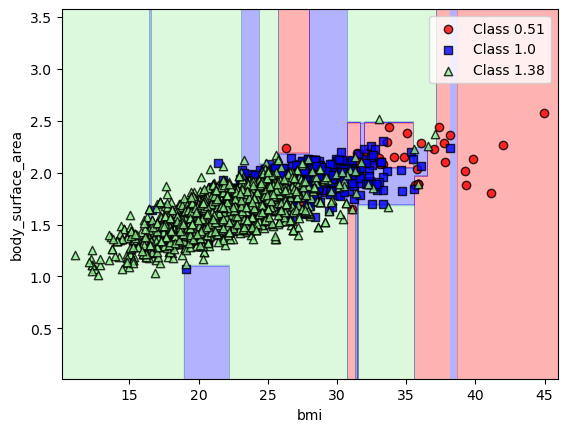

In [12]:
# pitch factor

from sklearn.preprocessing import OrdinalEncoder
columns = ['bmi', 'body_surface_area']
X = df_chest.loc[:, columns]
y = df_chest['pitch factor']
y = y.astype('str')

# oe_columns = ['scan_method']

# oe = OrdinalEncoder()
# oe.set_output(transform='pandas')

# X[oe_columns] = oe.fit_transform(X[oe_columns])
# X[[ 'scan_method']] = X[[ 'scan_method']].astype('object')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=8,
                                    random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
accuracy_score(y_test, y_pred)

plot_decision_regions(X[columns], y.values, classifier=tree_model)

C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


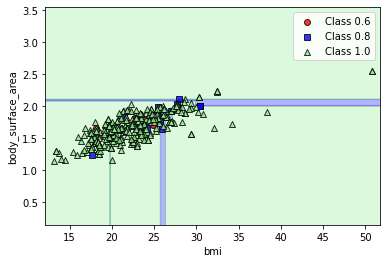

In [531]:
# pitch factor

columns = ['bmi', 'body_surface_area']
X = df_dual.loc[:, columns]
y = df_dual['exposure time per rotation']
y = y.astype('str')

# oe_columns = ['scan_method']

# oe = OrdinalEncoder()
# oe.set_output(transform='pandas')

# X[oe_columns] = oe.fit_transform(X[oe_columns])
# X[[ 'scan_method']] = X[[ 'scan_method']].astype('object')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=8,
                                    random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
accuracy_score(y_test, y_pred)

plot_decision_regions(X[columns], y.values, classifier=tree_model)

In [13]:
# Defining the pitch_factor_pred and rotation_time_pred functions

def pitch_factor_pred(df):
    columns = [ 'bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['pitch factor']
    y = y.astype('str')
    scores = []

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=8,
                                        random_state=42)
        tree_model.fit(X_tr, y_tr)
        y_pred = tree_model.predict(X_va)
        scores.append(accuracy_score(y_va, y_pred))
        
    return np.mean(scores)
    

def rotation_time_pred(df):
    columns = [ 'bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['exposure time per rotation']
    y = y.astype('str')
    scores = []

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=8,
                                        random_state=42)
        tree_model.fit(X_tr, y_tr)
        y_pred = tree_model.predict(X_va)
        scores.append(accuracy_score(y_va, y_pred))
        
    return np.mean(scores)

# Calculate scores for each dataframe using pitch_factor_pred and rotation_time_pred functions
pitch_scores = []
rotation_scores = []

for sub_df in df_list:
    pitch_scores.append(pitch_factor_pred(sub_df))
    rotation_scores.append(rotation_time_pred(sub_df))

# Add the scores as new features to each dataframe
for idx, sub_df in enumerate(df_list):
    sub_df['pitch_score'] = pitch_scores[idx]
    sub_df['rotation_score'] = rotation_scores[idx]

# Concatenate all dataframes to create the final dataframe
final_df = pd.concat(df_list, axis=0)

final_df.head()


/tmp/ipykernel_101/4032544999.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['pitch_score'] = pitch_scores[idx]
/tmp/ipykernel_101/4032544999.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['rotation_score'] = rotation_scores[idx]
/tmp/ipykernel_101/4032544999.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,pitch factor,exposure time per rotation,age,gender,height_cm,weight_kg,scan_area,scan_method,bmi,bmr,body_surface_area,age_era,pitch_score,rotation_score
0,1.38,0.5,86,F,150.0,49.1,胸部CT,単純,21.82,1000.01,1.421484,80,0.790745,0.954545
1,1.38,0.5,61,M,163.0,74.0,胸部CT,単純,27.85,1487.40,1.797322,60,0.790745,0.954545
2,1.38,0.5,46,M,178.0,68.0,胸部CT,単純,21.46,1581.27,1.848150,40,0.790745,0.954545
3,1.38,0.5,52,M,182.0,70.0,胸部CT,単純,21.13,1588.26,1.901449,50,0.790745,0.954545
4,1.38,0.5,52,M,175.0,112.0,胸部CT,単純,36.57,2130.73,2.256766,50,0.790745,0.954545


In [15]:
np.mean(pitch_scores)

0.8544372811413513

C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


IndexError: tuple index out of range

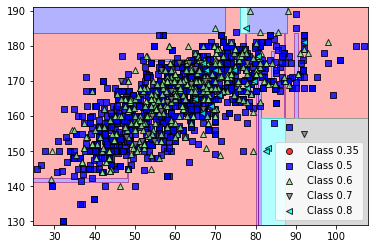

In [515]:
# exposure time per rotation
columns = ['weight_kg', 'height_cm']
X = df_chest_pelvis.loc[:, columns]
y = df_chest_pelvis['exposure time per rotation']
y = y.astype('str')


# oe_columns = ['gender', 'scan_method']

# oe = OrdinalEncoder()
# oe.set_output(transform='pandas')

# X[oe_columns] = oe.fit_transform(X[oe_columns])
# X[['gender', 'scan_method']] = X[['gender', 'scan_method']].astype('object')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=8,
                                    random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
accuracy_score(y_test, y_pred)

plot_decision_regions(X[columns].values, y.values, classifier=tree_model)

In [172]:
plt.scatter()
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=8,
                                    random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
accuracy_score(y_test, y_pred)

### SVCで実行する

In [524]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder
columns = ['weight_kg', 'height_cm']
X = df_lung.loc[:, columns]
y = df_lung['exposure time per rotation']
y = y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# oe_columns = ['scan_method']

# oe = OrdinalEncoder()
# oe.set_output(transform='pandas')
"""
# X[oe_columns] = oe.fit_transform(X[oe_columns])
# X[[ 'scan_method']] = X[[ 'scan_method']].astype('object')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oe_columns = ['gender', 'scan_method']

oe = OrdinalEncoder()
sc = StandardScaler()

num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()

ct = ColumnTransformer([('scaler', StandardScaler(), num_cols),
                        ('oe', OrdinalEncoder(), cat_cols)])
ct.set_output(transform='pandas')
"""
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()

ct = ColumnTransformer([('scaler', StandardScaler(), num_cols)])
ct.set_output(transform='pandas')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.2222222222222222

C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


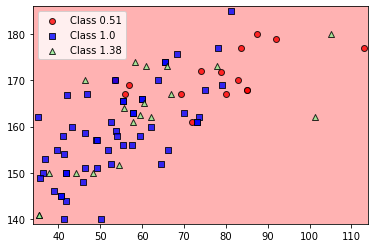

In [522]:
plot_decision_regions(X[columns].values, y.values, classifier=svm)

In [233]:
from sklearn.svm import SVC
gammas = [0.001, 0.01, 0.1 , 1, 10.0, 100.0, 1000.0]
Cs = [0.001, 0.01, 0.1 , 1, 10.0, 100.0, 1000.0]
best_accuracy = 0
gamma_list = []
C_list = []
for gamma in gammas:
    for C in Cs:
        svm = SVC(kernel='rbf', random_state=42, C=C, gamma=gamma)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            print(accuracy)
            gamma_list.append(gamma)
            C_list.append(C)

C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7201309328968903


C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7610474631751227
0.8036006546644845
0.806873977086743


C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.8085106382978723
0.8117839607201309
0.8150572831423896


C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.8166939443535188


C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ZIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [230]:
C

In [231]:
accuracy_score(y_test, y_pred)

0.7970540098199672

In [16]:
def classify_pitch_factor_updated(df):
    """Classify pitch factor using a decision tree model and return predictions for the entire dataset."""
    columns = ['bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['pitch factor']
    y = y.astype('str')
    
    predictions = np.zeros(len(df))
    
    # Splitting and training the model
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
        tree_model.fit(X_tr, y_tr)

        y_pred = tree_model.predict(X_va)
        predictions[va_idx] = y_pred
    
    return predictions

# Adding predicted pitch factor to each dataframe in df_list using the updated function
for sub_df in df_list:
    sub_df['predicted_pitch_factor'] = classify_pitch_factor_updated(sub_df)

# Concatenating all dataframes in df_list to create one final dataframe
final_combined_df = pd.concat(df_list, axis=0)

final_combined_df.head()



/tmp/ipykernel_101/1389943154.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['predicted_pitch_factor'] = classify_pitch_factor_updated(sub_df)
/tmp/ipykernel_101/1389943154.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['predicted_pitch_factor'] = classify_pitch_factor_updated(sub_df)
/tmp/ipykernel_101/1389943154.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,pitch factor,exposure time per rotation,age,gender,height_cm,weight_kg,scan_area,scan_method,bmi,bmr,body_surface_area,age_era,pitch_score,rotation_score,predicted_pitch_factor
0,1.38,0.5,86,F,150.0,49.1,胸部CT,単純,21.82,1000.01,1.421484,80,0.790745,0.954545,1.38
1,1.38,0.5,61,M,163.0,74.0,胸部CT,単純,27.85,1487.40,1.797322,60,0.790745,0.954545,1.00
2,1.38,0.5,46,M,178.0,68.0,胸部CT,単純,21.46,1581.27,1.848150,40,0.790745,0.954545,1.38
3,1.38,0.5,52,M,182.0,70.0,胸部CT,単純,21.13,1588.26,1.901449,50,0.790745,0.954545,1.38
4,1.38,0.5,52,M,175.0,112.0,胸部CT,単純,36.57,2130.73,2.256766,50,0.790745,0.954545,1.38


In [17]:
def classify_exposure_time_updated(df):
    """Classify exposure time per rotation using a decision tree model and return predictions for the entire dataset."""
    columns = ['bmi', 'body_surface_area']
    X = df.loc[:, columns]
    y = df['exposure time per rotation']
    y = y.astype('str')
    
    predictions = np.zeros(len(df), dtype=object)  # Ensure dtype is object for string predictions
    
    # Splitting and training the model
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for fold, (tr_idx, va_idx) in enumerate(kf.split(X)):
        X_tr = X.iloc[tr_idx]
        X_va = X.iloc[va_idx]
        y_tr = y.iloc[tr_idx]
        y_va = y.iloc[va_idx]

        tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
        tree_model.fit(X_tr, y_tr)

        y_pred = tree_model.predict(X_va)
        predictions[va_idx] = y_pred
    
    return predictions

# Adding predicted exposure time to each dataframe in df_list using the updated function
for sub_df in df_list:
    sub_df['predicted_exposure_time'] = classify_exposure_time_updated(sub_df)

# Concatenating all dataframes in df_list to create one final dataframe
final_combined_df_exposure = pd.concat(df_list, axis=0)

final_combined_df_exposure.head()

/tmp/ipykernel_101/2160553616.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['predicted_exposure_time'] = classify_exposure_time_updated(sub_df)
/tmp/ipykernel_101/2160553616.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['predicted_exposure_time'] = classify_exposure_time_updated(sub_df)
/tmp/ipykernel_101/2160553616.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,pitch factor,exposure time per rotation,age,gender,height_cm,weight_kg,scan_area,scan_method,bmi,bmr,body_surface_area,age_era,pitch_score,rotation_score,predicted_pitch_factor,predicted_exposure_time
0,1.38,0.5,86,F,150.0,49.1,胸部CT,単純,21.82,1000.01,1.421484,80,0.790745,0.954545,1.38,0.5
1,1.38,0.5,61,M,163.0,74.0,胸部CT,単純,27.85,1487.40,1.797322,60,0.790745,0.954545,1.00,0.5
2,1.38,0.5,46,M,178.0,68.0,胸部CT,単純,21.46,1581.27,1.848150,40,0.790745,0.954545,1.38,0.5
3,1.38,0.5,52,M,182.0,70.0,胸部CT,単純,21.13,1588.26,1.901449,50,0.790745,0.954545,1.38,0.5
4,1.38,0.5,52,M,175.0,112.0,胸部CT,単純,36.57,2130.73,2.256766,50,0.790745,0.954545,1.38,0.5


In [18]:
final_combined_df_exposure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8540 entries, 0 to 8538
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pitch factor                8540 non-null   float64
 1   exposure time per rotation  8540 non-null   float64
 2   age                         8540 non-null   int64  
 3   gender                      8540 non-null   object 
 4   height_cm                   8540 non-null   float64
 5   weight_kg                   8540 non-null   float64
 6   scan_area                   8540 non-null   object 
 7   scan_method                 8540 non-null   object 
 8   bmi                         8540 non-null   float64
 9   bmr                         8540 non-null   float64
 10  body_surface_area           8540 non-null   float64
 11  age_era                     8540 non-null   int64  
 12  pitch_score                 8540 non-null   float64
 13  rotation_score              8540 

In [20]:
# Converting the dtype of 'predicted_exposure_time' to float64
final_combined_df_exposure['predicted_exposure_time'] = final_combined_df_exposure['predicted_exposure_time'].astype('float64')

# Checking the dtype of 'predicted_exposure_time' and displaying the head of the dataframe
final_combined_df_exposure.head()

,pitch factor,exposure time per rotation,age,gender,height_cm,weight_kg,scan_area,scan_method,bmi,bmr,body_surface_area,age_era,pitch_score,rotation_score,predicted_pitch_factor,predicted_exposure_time
0,1.38,0.5,86,F,150.0,49.1,胸部CT,単純,21.82,1000.01,1.421484,80,0.790745,0.954545,1.38,0.5
1,1.38,0.5,61,M,163.0,74.0,胸部CT,単純,27.85,1487.40,1.797322,60,0.790745,0.954545,1.00,0.5
2,1.38,0.5,46,M,178.0,68.0,胸部CT,単純,21.46,1581.27,1.848150,40,0.790745,0.954545,1.38,0.5
3,1.38,0.5,52,M,182.0,70.0,胸部CT,単純,21.13,1588.26,1.901449,50,0.790745,0.954545,1.38,0.5
4,1.38,0.5,52,M,175.0,112.0,胸部CT,単純,36.57,2130.73,2.256766,50,0.790745,0.954545,1.38,0.5
